<a href="https://colab.research.google.com/github/vladlesnyh/optimization/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0_%D0%BC%D0%B0%D1%80%D1%88%D1%80%D1%83%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%BE%D1%80%D1%82%D0%BD%D1%8B%D1%85_%D1%81%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В задаче выбора маршрута транспортных средств (VRP) цель состоит в том, чтобы найти оптимальные маршруты для нескольких транспортных средств, посещающих набор мест. (Когда имеется только один автомобиль, это сводится к задаче коммивояжера.)

Но что мы подразумеваем под «оптимальными маршрутами» для VRP? Один из ответов — маршруты с наименьшим общим расстоянием. Однако, если нет других ограничений, оптимальным решением будет назначить только одно транспортное средство для посещения всех мест и найти кратчайший маршрут для этого транспортного средства. По сути, это та же проблема, что и задача коммивояжера.

Лучший способ определить оптимальные маршруты — минимизировать длину самого длинного маршрута среди всех транспортных средств. Это правильное определение, если цель состоит в том, чтобы завершить все поставки как можно скорее. В приведенном ниже примере VRP определяются оптимальные маршруты, определенные таким образом.

Пример VRP

В этом разделе представлен пример VRP, целью которого является минимизация самого длинного одиночного маршрута.

Представьте себе компанию, которой необходимо посетить своих клиентов в городе, состоящем из одинаковых прямоугольных кварталов. Схема города показана ниже: расположение компании отмечено черным цветом, а места для посещения — синим.

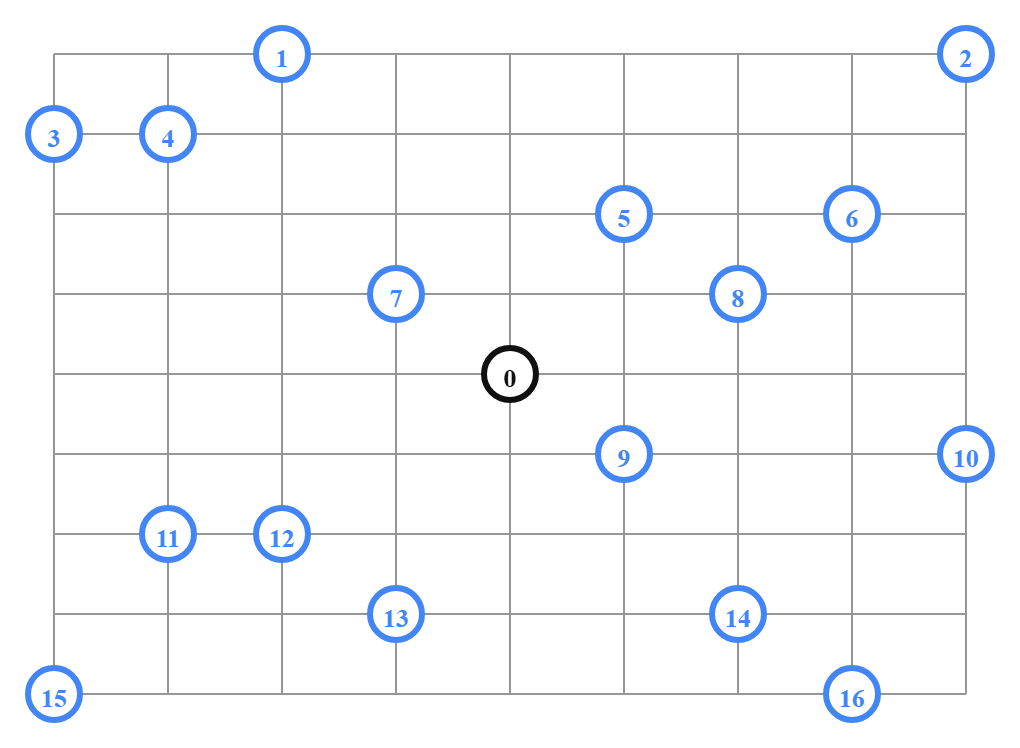

Решение примера VRP с помощью OR-Tools

В следующих разделах объясняется, как решить пример VRP с помощью OR-Tools.

Создайте данные

Следующая функция создает данные для задачи.

In [ ]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [
        # fmt: off
      [0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354, 468, 776, 662],
      [548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674, 1016, 868, 1210],
      [776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164, 1130, 788, 1552, 754],
      [696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822, 1164, 560, 1358],
      [582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708, 1050, 674, 1244],
      [274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628, 514, 1050, 708],
      [502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856, 514, 1278, 480],
      [194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320, 662, 742, 856],
      [308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662, 320, 1084, 514],
      [194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388, 274, 810, 468],
      [536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764, 730, 388, 1152, 354],
      [502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114, 308, 650, 274, 844],
      [388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194, 536, 388, 730],
      [354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0, 342, 422, 536],
      [468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536, 342, 0, 764, 194],
      [776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274, 388, 422, 764, 0, 798],
      [662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730, 536, 194, 798, 0],
        # fmt: on
    ]
    data["num_vehicles"] = 4
    data["depot"] = 0
    return data

Данные состоят из:

distance_matrix : Массив расстояний между локациями в метрах.

num_vehicles : количество автомобилей в парке.

depot : индекс депо, место, где все транспортные средства начинают и заканчивают свой маршрут.

Координаты местоположения

Чтобы настроить пример и вычислить матрицу расстояний, мы присвоили следующие координаты x - y местам, показанным на диаграмме города :

In [ ]:
[(456, 320), # location 0 - the depot
(228, 0),    # location 1
(912, 0),    # location 2
(0, 80),     # location 3
(114, 80),   # location 4
(570, 160),  # location 5
(798, 160),  # location 6
(342, 240),  # location 7
(684, 240),  # location 8
(570, 400),  # location 9
(912, 400),  # location 10
(114, 480),  # location 11
(228, 480),  # location 12
(342, 560),  # location 13
(684, 560),  # location 14
(0, 640),    # location 15
(798, 640)]  # location 16

[(456, 320),
 (228, 0),
 (912, 0),
 (0, 80),
 (114, 80),
 (570, 160),
 (798, 160),
 (342, 240),
 (684, 240),
 (570, 400),
 (912, 400),
 (114, 480),
 (228, 480),
 (342, 560),
 (684, 560),
 (0, 640),
 (798, 640)]

Обратите внимание, что координаты местоположения не включены в данные задачи: все, что вам нужно для решения задачи, — это матрица расстояний, которую мы предварительно вычислили. Вам нужны только данные о местоположении, чтобы идентифицировать местоположения в решении, которые обозначены их индексами (0, 1, 2...) в приведенном выше списке.

Основная цель показа координат местоположения и схемы города в этом и других примерах — обеспечить наглядное отображение проблемы и ее решения. Но это не существенно для решения задачи.

Для удобства постановки задачи расстояния между местоположениями рассчитываются с использованием Манхэттенского расстояния , в котором расстояние между двумя точками ( x 1 , y 1 ) и ( x 2 , y 2 ) определяется как | х 1 - х 2 | + | у 1 - у 2 |. Однако особых оснований для использования этого определения нет. Для расчета расстояний вы можете использовать любой метод, который лучше всего подходит для вашей задачи.

Как и в примере задачи коммивояжера, следующая функция создает обратный вызов расстояния, который возвращает расстояния между местоположениями, и передает их решателю. Он также устанавливает стоимость дуги, которая определяет стоимость перемещения, как расстояние между дугами.

In [ ]:
  # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Возвращаем расстояние между двумя точками."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

IndentationError: unexpected indent (ipython-input-435664827.py, line 2)

Добавить размер расстояния

Чтобы решить эту задачу, вам необходимо создать измерение расстояния, которое вычисляет совокупное расстояние, пройденное каждым транспортным средством по его маршруту. Затем вы можете установить стоимость, пропорциональную максимальному общему расстоянию по каждому маршруту. Программы маршрутизации используют измерения для отслеживания количеств, которые накапливаются на маршруте транспортного средства. См. «Размеры» для получения более подробной информации.

Следующий код создает измерение расстояния с помощью метода AddDimension решателя. transit_callback_index является индексом distance_callback .

In [ ]:
 # Add Distance constraint.
    dimension_name = "Расстояние"
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name,
    )
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

IndentationError: unexpected indent (ipython-input-3929936840.py, line 2)

Метод SetGlobalSpanCostCoefficient устанавливает большой коэффициент ( 100 ) для глобального диапазона маршрутов, который в этом примере является максимальным из расстояний маршрутов. Это делает глобальный интервал преобладающим фактором в целевой функции, поэтому программа минимизирует длину самого длинного маршрута.

Функция, которая печатает решение, показана ниже.

In [ ]:
def print_solution(data, manager, routing, solution):
    """Вывод решения."""
    print(f"Objective: {solution.ObjectiveValue()}")
    max_route_distance = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Маршрут ТС {vehicle_id}:\n"
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += f" {manager.IndexToNode(index)} -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f"{manager.IndexToNode(index)}\n"
        plan_output += f"Расстояние маршрута: {route_distance}м\n"
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print(f"Максимальное расстояние маршрутов: {max_route_distance}м")

Установим библиотеку OR-Tools


In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.31.1 which is incompatible.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.

Полный текст программы задачи маршрутизации

In [ ]:
"""Simple Vehicles Routing Problem (VRP).

   This is a sample using the routing library python wrapper to solve a VRP
   problem.
   A description of the problem can be found here:
   http://en.wikipedia.org/wiki/Vehicle_routing_problem.

   Distances are in meters.
"""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Задание данных для задачи."""
    data = {}
    data["distance_matrix"] = [
        # fmt: off
      [0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354, 468, 776, 662],
      [548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674, 1016, 868, 1210],
      [776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164, 1130, 788, 1552, 754],
      [696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822, 1164, 560, 1358],
      [582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708, 1050, 674, 1244],
      [274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628, 514, 1050, 708],
      [502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856, 514, 1278, 480],
      [194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320, 662, 742, 856],
      [308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662, 320, 1084, 514],
      [194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388, 274, 810, 468],
      [536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764, 730, 388, 1152, 354],
      [502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114, 308, 650, 274, 844],
      [388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194, 536, 388, 730],
      [354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0, 342, 422, 536],
      [468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536, 342, 0, 764, 194],
      [776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274, 388, 422, 764, 0, 798],
      [662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730, 536, 194, 798, 0],
        # fmt: on
    ]
    data["num_vehicles"] = 4
    data["depot"] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Вывод решения."""
    print(f"Objective: {solution.ObjectiveValue()}")
    max_route_distance = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Маршрут ТС {vehicle_id}:\n"
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += f" {manager.IndexToNode(index)} -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f"{manager.IndexToNode(index)}\n"
        plan_output += f"Расстояние маршрута: {route_distance}м\n"
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print(f"Максимальное расстояние маршрутов: {max_route_distance}м")



def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Возвращаем расстояние между двумя точками."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = "Расстояние"
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name,
    )
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print("Решение не найдено !")


if __name__ == "__main__":
    main()

Objective: 177500
Маршрут ТС 0:
 0 ->  9 ->  10 ->  2 ->  6 ->  5 -> 0
Расстояние маршрута: 1712м

Маршрут ТС 1:
 0 ->  16 ->  14 ->  8 -> 0
Расстояние маршрута: 1484м

Маршрут ТС 2:
 0 ->  7 ->  1 ->  4 ->  3 -> 0
Расстояние маршрута: 1552м

Маршрут ТС 3:
 0 ->  13 ->  15 ->  11 ->  12 -> 0
Расстояние маршрута: 1552м

Максимальное расстояние маршрутов: 1712м
